L2 Norm: 156.21793 , Iteration Parameters: Vp: 600.00, Vs: 50.00
L2 Norm: 156.21794 , Iteration Parameters: Vp: 600.00, Vs: 50.00
L2 Norm: 63.62494 , Iteration Parameters: Vp: 600.00, Vs: 50.00
L2 Norm: 63.62494 , Iteration Parameters: Vp: 600.00, Vs: 42.08
L2 Norm: 63.62495 , Iteration Parameters: Vp: 600.00, Vs: 42.08
L2 Norm: 25.26005 , Iteration Parameters: Vp: 600.00, Vs: 42.08
L2 Norm: 25.26005 , Iteration Parameters: Vp: 600.00, Vs: 38.50
L2 Norm: 25.26005 , Iteration Parameters: Vp: 600.00, Vs: 38.50
L2 Norm: 17.76045 , Iteration Parameters: Vp: 600.00, Vs: 38.50
L2 Norm: 17.76045 , Iteration Parameters: Vp: 600.00, Vs: 37.22
L2 Norm: 17.76045 , Iteration Parameters: Vp: 600.00, Vs: 37.22
L2 Norm: 17.54267 , Iteration Parameters: Vp: 600.00, Vs: 37.22
L2 Norm: 17.54267 , Iteration Parameters: Vp: 600.00, Vs: 36.99
L2 Norm: 17.54267 , Iteration Parameters: Vp: 600.00, Vs: 36.99
L2 Norm: 17.54119 , Iteration Parameters: Vp: 600.00, Vs: 36.99
L2 Norm: 17.54119 , Iteration Paramete

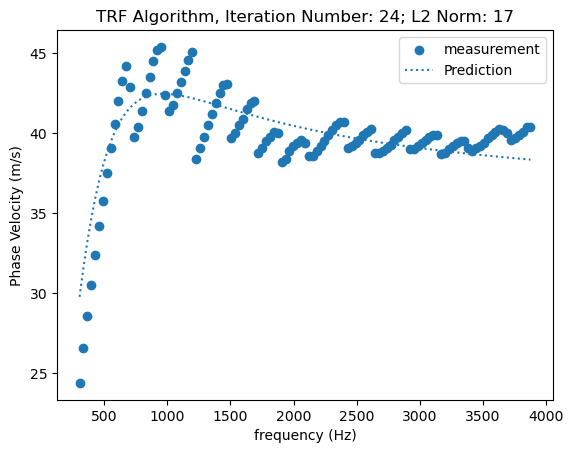

In [1]:
import numpy as np
import CMASW_Sphere

filename = 'Vel_freq_dispersion_data_picks_Kiwi_vx09.dat'#'data_cmasw_mode1_kiwi-tail.dat'#'data_cmasw_mode1_kiwi.dat'# 'NWZ1_30112023_dispersion.txt' #

n = 1
vp = [600]
vs = [50]
R = 0.028405 #0.028295
x_initial=  vp + vs #+ [0.35]*n + [2000]*n + [1,5,10]  
lb = [600]*n  + [30]*n # [800]*n  + [20]*n 
ub = [700]*n + [100]*n # [1700]*n + [100]*n 

test = CMASW_Sphere.cmasw(filename, np.array(x_initial), np.array(lb), np.array(ub), R)
test.inverse()

#56.81/2
'
inversion is done
Shear Velocity 36.98263202567267
P wave velocity: 699.9999999999999
'

# Estimate error of parameters from the Jacovian matrix

Massive errors on $V_P$, but not so much on $V_S$.

In [2]:
J = test.jac[0] # Jacovian of last iteraton
vp, vs =test.para[-1] # Parameters of last iteration
yd = test.y_data # Observed data
ym = np.array(test.velocity(test.omega, vp, vs)) # Forward model

# Standard error of parameters estimated
residuals = yd - ym # Residuals from the fit
cov_params = np.linalg.inv(np.dot(J.T, J))  # Covariance matrix of parameters
var_residuals = np.sum(residuals**2) / (len(yd) - len(test.para))  # Variance of residuals
# Calculate standard errors of the estimated parameters
se_params = np.sqrt(np.diag(cov_params * var_residuals))
print('Errors of params:' , se_params)

Errors of params: [3.35764278e+04 6.40181453e-01]


In [3]:
test.para[-1]

array([700.        ,  36.98263253])

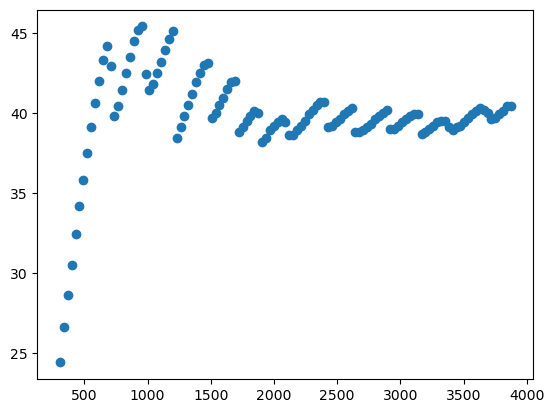

In [4]:
import numpy as np
import matplotlib.pyplot as plt
filename = 'Vel_freq_dispersion_data_picks_Kiwi_vx09.dat'
F, V = np.loadtxt(filename, delimiter = ' ', unpack = True)
plt.scatter(F,V)

In [ ]:
#f,V = np.loadtxt('data_cmasw.txt',delimiter = ' ',unpack = True)


In [ ]:
# cL = 1200
# cT = 57.5
# cR = 57 

In [ ]:
pred = np.loadtxt('prediction.txt')

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(test.y_data)
plt.plot(pred)

In [ ]:
# Original values
cL = 1200 #1100 #860.0 #5660 #6350 #3480 #5660 # m/s
cT = 57.5#60.8 #48.0 #3120 #3170 #cL/2.03100960115899 #cL/2#3120 # m/s
cR = 57 #45.0